<a href="https://colab.research.google.com/github/wisesprout/dl-selfie-filter/blob/main/CodestatesProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GET DATA

In [16]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [17]:
# get data from kaggle
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c facial-keypoints-detection

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                            title                                              size  lastUpdated          downloadCount  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
yasserh/wine-quality-dataset                                   Wine Quality Dataset                               21KB  2022-01-15 19:15:11           4921  
prasertk/netflix-subscription-price-in-different-countries     Netflix subscription fee in different countries     3KB  2022-01-15 07:06:09           4409  
prasertk/the-best-cities-for-a-workation                       The Best Cities for a Workation                     6KB  2022-02-16 11:46:28            415  
majyhain/height-of-male-and-female-by-country-2022             Height of Male and Female by Country 2022           4K

In [18]:
# unzip zipped files
! unzip test.zip
! unzip training.zip

Archive:  test.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: training.csv            


In [19]:
train = pd.read_csv('/content/training.csv')
test = pd.read_csv('/content/test.csv')

In [20]:
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [21]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


# PREPROCESSING DATA

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [23]:
train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [24]:
# KAGGLE GOLD
# fill missing values with the previous values in that row
train.fillna(method='ffill', inplace=True)

In [25]:
train.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [26]:
# split feature=img/target=coordinates values
train_img = train['Image'].apply(lambda x: np.fromstring(x, sep=' '))
train_img = np.vstack(train_img.values)/255  # normalize => scale pixel values to [0,1]
train_img = train_img.astype(np.float32)
X_train = train_img.reshape(-1, 96, 96, 1)  # return each images as 96*96*1
X_train

array([[[[0.93333334],
         [0.9254902 ],
         [0.92941177],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        [[0.92156863],
         [0.93333334],
         [0.9254902 ],
         ...,
         [0.9764706 ],
         [0.98039216],
         [0.9843137 ]],

        [[0.92941177],
         [0.9254902 ],
         [0.92941177],
         ...,
         [0.9843137 ],
         [0.9843137 ],
         [0.98039216]],

        ...,

        [[0.7294118 ],
         [0.7176471 ],
         [0.70980394],
         ...,
         [0.20392157],
         [0.22352941],
         [0.23529412]],

        [[0.7411765 ],
         [0.7372549 ],
         [0.8117647 ],
         ...,
         [0.23921569],
         [0.27058825],
         [0.30588236]],

        [[0.7490196 ],
         [0.72156864],
         [0.72156864],
         ...,
         [0.27450982],
         [0.29411766],
         [0.3529412 ]]],


       [[[0.85882354],
         [0.84313726],
         [0.8 

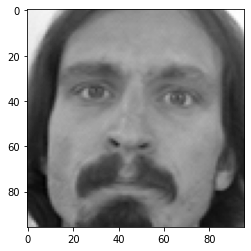

In [27]:
# show first image
plt.imshow(X_train[0].reshape(96,96), cmap='gray')

In [28]:
y_train = train[train.columns[:-1]].values
y_train = (y_train-48)/48
y_train = y_train.astype(np.float32)
y_train

array([[ 0.37569925, -0.18745263, -0.37027067, ...,  0.5194887 ,
        -0.10144361,  0.7601203 ],
       [ 0.3402695 , -0.27145675, -0.37605673, ...,  0.46388653,
        -0.05275177,  0.7808369 ],
       [ 0.35535526, -0.27271578, -0.35617104, ...,  0.46232894,
        -0.01510526,  0.63873684],
       ...,
       [ 0.38939023, -0.23239122, -0.34028292, ...,  0.58257484,
         0.03047024,  0.62744   ],
       [ 0.4784392 , -0.1697153 , -0.36368155, ...,  0.58257484,
         0.04302471,  0.65805095],
       [ 0.39454815, -0.09532271, -0.35216543, ...,  0.58257484,
        -0.04374   ,  0.7244395 ]], dtype=float32)

In [29]:
# BLOG
'''
# drop missing values
train = train.dropna()

# convert 'image' column data from object to numpy array
train['Image'] = train['Image'].apply(lambda x: np.fromstring(x, sep=' '))

train_image = np.vstack(train['Image'].values)/255  # normalize => scale pixel values to [0,1]
train_image = train_image.astype(np.float32)
train_image = train_image.reshape(-1, 96, 96, 1)  # return each images as 96*96*1

train_cor = train[train.columns[:-1]].values
train_cor = (train_cor - 48) / 48  # normalize => scale target coordinates to [-1, 1]
#train_image, train_cor = shuffle(train_image, train_cor, random_state=42)  # shuffle train data
train_cor = train_cor.astype(np.float32)'''

"\n# drop missing values\ntrain = train.dropna()\n\n# convert 'image' column data from object to numpy array\ntrain['Image'] = train['Image'].apply(lambda x: np.fromstring(x, sep=' '))\n\ntrain_image = np.vstack(train['Image'].values)/255  # normalize => scale pixel values to [0,1]\ntrain_image = train_image.astype(np.float32)\ntrain_image = train_image.reshape(-1, 96, 96, 1)  # return each images as 96*96*1\n\ntrain_cor = train[train.columns[:-1]].values\ntrain_cor = (train_cor - 48) / 48  # normalize => scale target coordinates to [-1, 1]\n#train_image, train_cor = shuffle(train_image, train_cor, random_state=42)  # shuffle train data\ntrain_cor = train_cor.astype(np.float32)"

In [30]:
'''train_image'''

'train_image'

In [31]:
'''train_cor'''

'train_cor'

# BUILD MODEL

In [32]:
model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        288       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9216      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                      

In [33]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

# FIT MODEL

In [34]:
model.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)

Epoch 1/50
23/23 [==============================] - 30s 595ms/step - loss: 1.1608 - mae: 0.4814 - val_loss: 0.1119 - val_mae: 0.2892
Epoch 2/50
23/23 [==============================] - 11s 481ms/step - loss: 0.0267 - mae: 0.1225 - val_loss: 0.0899 - val_mae: 0.2595
Epoch 3/50
23/23 [==============================] - 11s 483ms/step - loss: 0.0168 - mae: 0.0953 - val_loss: 0.0718 - val_mae: 0.2260
Epoch 4/50
23/23 [==============================] - 11s 483ms/step - loss: 0.0144 - mae: 0.0868 - val_loss: 0.0475 - val_mae: 0.1832
Epoch 5/50
23/23 [==============================] - 11s 484ms/step - loss: 0.0121 - mae: 0.0795 - val_loss: 0.0461 - val_mae: 0.1790
Epoch 6/50
23/23 [==============================] - 11s 486ms/step - loss: 0.0109 - mae: 0.0753 - val_loss: 0.0336 - val_mae: 0.1502
Epoch 7/50
23/23 [==============================] - 11s 489ms/step - loss: 0.0109 - mae: 0.0760 - val_loss: 0.0179 - val_mae: 0.1086
Epoch 8/50
23/23 [==============================] - 11s 487ms/step - 

# TEST MODEL

# LIVE CAM TEST